In [1]:
import os
os.getcwd()

'/home/ik/Downloads/DeepLearningfromScratch'

In [2]:
import numpy as np
from dezero import Variable
from dezero.utils import plot_dot_graph

In [3]:
def matyas(x, y):
    z = 0.26 * (x ** 2 + y ** 2) - 0.48 * x * y
    return z
    
def goldstein(x, y):
    z = (1 + (x+y+1)**2 * (19-14*x+3*x**2-14*y+6*x*y+3*y**2)) * \
        (30 + (2*x-3*y)**2 * (18-32*x+12*x**2+48*y-36*x*y+27*y**2))
    return z

In [ ]:
x = Variable(np.array(1.0))
y = Variable(np.array(1.0))
z = goldstein(x, y)
z.backward()


x.name = 'x'
y.name = 'y'
z.name = 'z'

plot_dot_graph(z, verbose=False, to_file='goldstein.png')

In [5]:
from dezero import Variable

x = Variable(np.array(np.pi/4))
y = sin(x)
y.backward()

print(y.data)
print(x.grad)

NameError: name 'sin' is not defined

In [9]:
!python steps/step27.py

Traceback (most recent call last):
  File "steps/step27.py", line 2, in <module>
    from .dezero import Function
ImportError: attempted relative import with no known parent package


0.7071067811865475
0.7071067811865476
/home/ik/Downloads/DeepLearningfromScratch/visualization/Sin.png


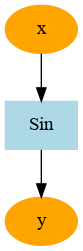

In [14]:
import numpy as np
from dezero import Function
from dezero import Variable

class Sin(Function):
    def forward(self, x):
        y = np.sin(x)
        return y
    
    def backward(self, gy):
        x = self.inputs[0].data
        gx = gy * np.cos(x)
        return gx
    
        

def sin(x):
    return Sin()(x)


x = Variable(np.array(np.pi/4))
y = sin(x)
y.backward()

print(y.data)
print(x.grad)

x.name = 'x'
y.name = 'y'
plot_dot_graph(y, verbose=False, to_file='Sin.png')

In [19]:
import math 

def my_sin(x, threshold=0.0000001):
    y = 0
    for i in range(100000):
        c = (-1) ** i / math.factorial(2 * i + 1)
        t = c * x ** (2 * i +1)
        y = y + t
        if abs(t.data) < threshold:
            break
    return y

/home/ik/Downloads/DeepLearningfromScratch/visualization/my_sin.png


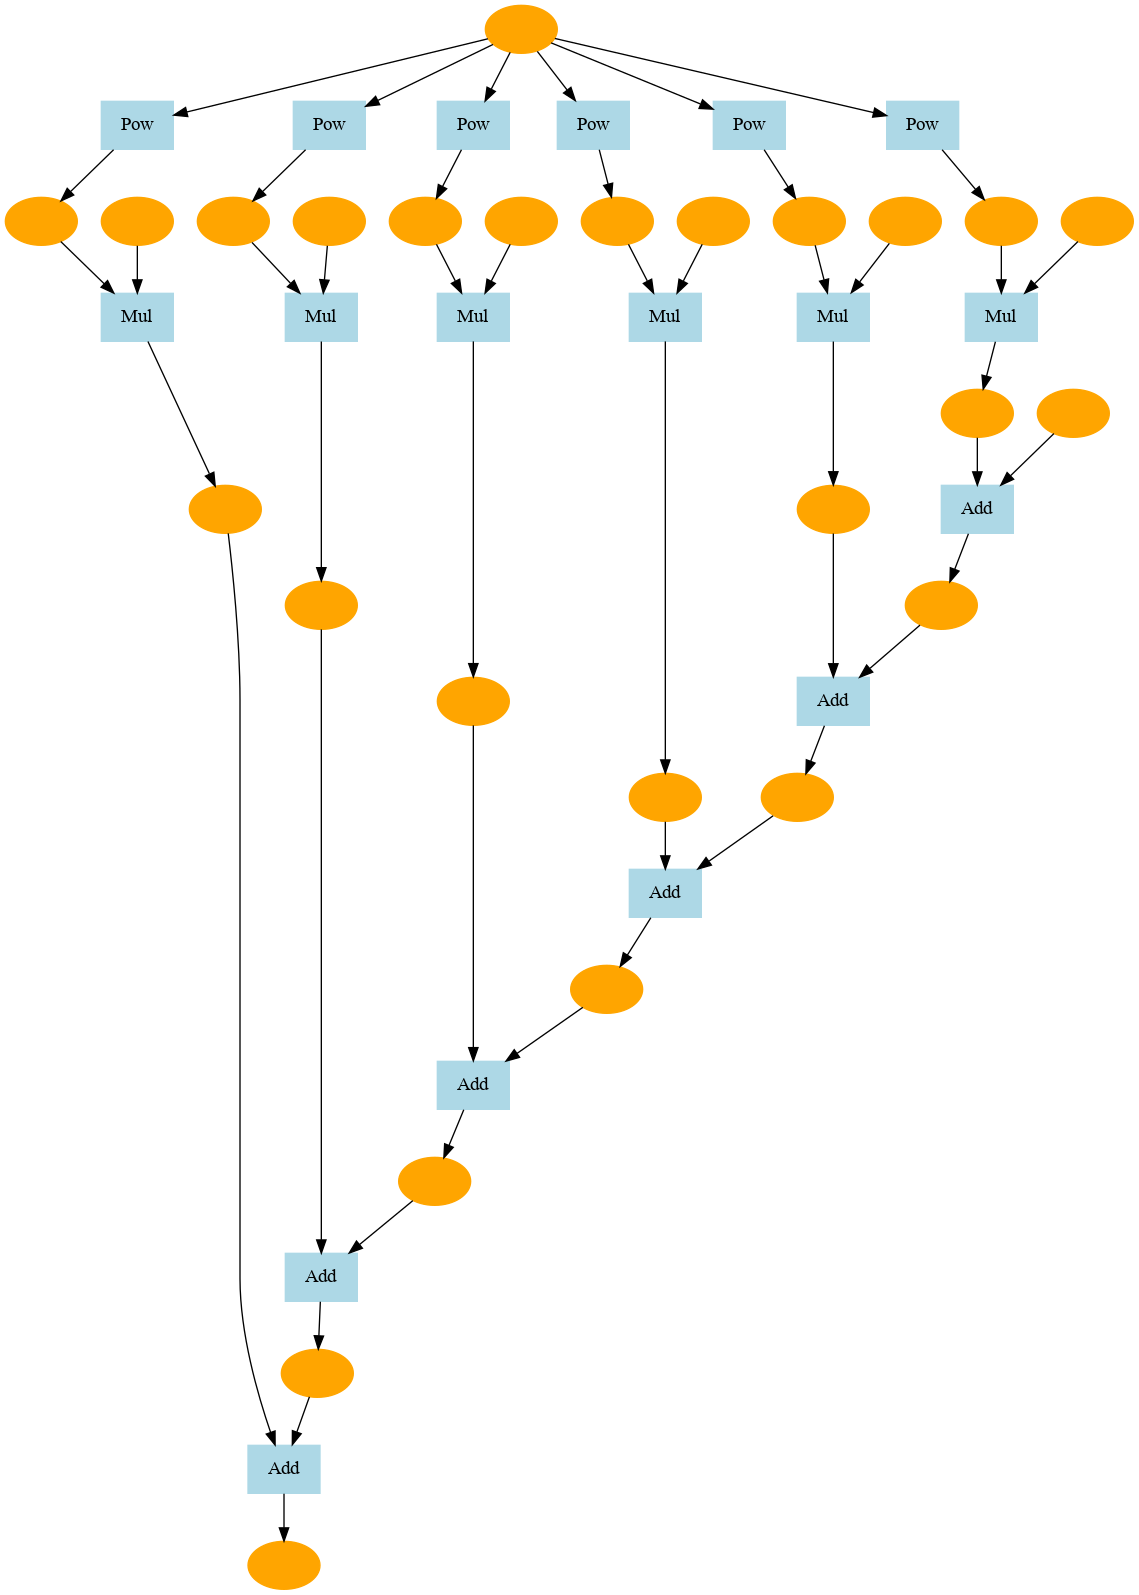

In [20]:
x = Variable(np.array(np.pi/4))
y = my_sin(x)
y.backward()

plot_dot_graph(y, verbose=False, to_file='my_sin.png')

In [21]:
import numpy as np
from dezero import Variable

def rosenbrock(x0, x1):
    y = 100 * (x1 - x0 ** 2) ** 2 + (1 - x0) ** 2
    return y

In [ ]:
x0 = Variable(np.array(0.0))
x1 = Variable(np.array(2.0))

lr = 0.001
iters = 1000

for i in range(iters):
    print(x0, x1)
    
    y = rosenbrock(x0, x1)
    
    x0.cleargrad()
    x1.cleargrad()
    y.backward()
    
    x0.data -= lr * x0.grad
    x1.data -= lr * x1.grad

In [26]:
def f(x):
    y = x**4 -2*x**2
    return y

def gx2(x):
    return 12*x**2 - 4

x = Variable(np.array(2.0))
iters = 10

for i in range(iters):
    print(i, x)
    y = f(x)
    x.cleargrad()
    y.backward()
    
    x.data -= x.grad / gx2(x.data)

0 variable(2.0)
1 variable(1.4545454545454546)
2 variable(1.1510467893775467)
3 variable(1.0253259289766978)
4 variable(1.0009084519430513)
5 variable(1.0000012353089454)
6 variable(1.000000000002289)
7 variable(1.0)
8 variable(1.0)
9 variable(1.0)
